## 0.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'colab'
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

! pip install datasist
from datasist.structdata import detect_outliers

## 0.2 Load Data

In [2]:
df = pd.read_csv('full_data.csv')
df.head()

,time,consumption_MWh,total_generation_MWh,natural_gas,hydro_dam,lignite,hydro_river,coal_imported,wind,solar,...,asphaltite_coal,hard_coal,biomass,naphtha,LNG,international,waste_heat,TRY/MWh,USD/MWh,EUR/MWh
0,01:01:2018:00:00,27412.81,27412.81,6926.78,4820.40,5226.32,1900.32,5314.05,1179.51,0.0,...,278.20,189.5,210.96,0.0,0.0,297.0,92.08,207.60,55.04,45.97
1,01:01:2018:01:00,26324.39,26324.39,6603.44,3644.32,5277.19,1877.83,5715.61,1148.46,0.0,...,284.82,205.5,211.67,0.0,0.0,287.0,91.14,205.34,54.44,45.47
2,01:01:2018:02:00,24635.32,24635.32,6040.77,2711.00,5325.47,1708.49,5701.37,1216.38,0.0,...,278.20,201.5,209.89,0.0,0.0,169.0,91.06,164.94,43.73,36.53
3,01:01:2018:03:00,23872.12,23872.12,5938.46,2524.37,5265.91,1662.59,5205.43,1298.11,0.0,...,271.57,211.5,211.24,0.0,0.0,214.0,91.83,154.52,40.97,34.22
4,01:01:2018:04:00,23194.89,23194.89,5665.41,2462.71,5282.88,1697.96,4804.19,1220.91,0.0,...,273.78,307.5,214.31,0.0,0.0,203.0,91.23,112.64,29.86,24.95


In [3]:
df['generation_gap'] = df['total_generation_MWh'] - df['consumption_MWh']
df[['total_generation_MWh', 'consumption_MWh', 'generation_gap']].head()

,total_generation_MWh,consumption_MWh,generation_gap
0,27412.81,27412.81,0.0
1,26324.39,26324.39,0.0
2,24635.32,24635.32,0.0
3,23872.12,23872.12,0.0
4,23194.89,23194.89,0.0


In [4]:
df.columns

Index(['time', 'consumption_MWh', 'total_generation_MWh', 'natural_gas',
       'hydro_dam', 'lignite', 'hydro_river', 'coal_imported', 'wind', 'solar',
       'fuel_oil', 'geothermal', 'asphaltite_coal', 'hard_coal', 'biomass',
       'naphtha', 'LNG', 'international', 'waste_heat', 'TRY/MWh', 'USD/MWh',
       'EUR/MWh', 'generation_gap'],
      dtype='object')

## 0.3 EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  52584 non-null  object 
 1   consumption_MWh       52584 non-null  float64
 2   total_generation_MWh  52584 non-null  float64
 3   natural_gas           52584 non-null  float64
 4   hydro_dam             52584 non-null  float64
 5   lignite               52584 non-null  float64
 6   hydro_river           52584 non-null  float64
 7   coal_imported         52584 non-null  float64
 8   wind                  52584 non-null  float64
 9   solar                 52584 non-null  float64
 10  fuel_oil              52584 non-null  float64
 11  geothermal            52584 non-null  float64
 12  asphaltite_coal       52584 non-null  float64
 13  hard_coal             52584 non-null  float64
 14  biomass               52584 non-null  float64
 15  naphtha            

In [6]:
pd.set_option('display.max_columns', None)
df.describe()

,consumption_MWh,total_generation_MWh,natural_gas,hydro_dam,lignite,hydro_river,coal_imported,wind,solar,fuel_oil,geothermal,asphaltite_coal,hard_coal,biomass,naphtha,LNG,international,waste_heat,TRY/MWh,USD/MWh,EUR/MWh,generation_gap
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.0,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000
mean,35166.891649,34399.243138,8725.505190,5614.316871,4901.607249,2219.311611,7128.778313,3137.646356,167.942769,83.699436,1044.447744,235.883465,415.177407,590.215587,0.0,0.018057,52.954873,81.734692,996.139021,72.190211,65.793224,-767.648510
std,5743.832244,5272.179656,4027.024572,2846.858883,616.084315,1333.785556,1823.970761,1910.953417,340.820824,54.734514,177.130975,82.835939,115.472528,251.158824,0.0,0.167291,360.610536,13.671189,1126.233416,49.815156,49.431674,1628.574317
min,15333.300000,15333.300000,496.660000,296.690000,2189.100000,379.960000,956.350000,42.530000,-1.700000,0.000000,525.110000,0.000000,77.500000,202.580000,0.0,0.000000,-3130.500000,30.690000,0.000000,0.000000,0.000000,-8596.820000
25%,30814.882500,30485.697500,5648.690000,3333.605000,4555.622500,1140.782500,5931.242500,1577.745000,0.000000,37.000000,916.442500,196.500000,331.500000,359.625000,0.0,0.000000,-216.617500,73.120000,280.000000,42.850000,36.090000,-291.000000
50%,35063.730000,34438.515000,8863.035000,5362.740000,4946.670000,1725.255000,7604.270000,2817.655000,3.510000,71.900000,1068.180000,231.830000,415.015000,543.140000,0.0,0.000000,0.000000,82.140000,326.815000,54.350000,48.210000,0.000000
75%,39281.595000,38188.935000,11551.372500,7667.975000,5314.530000,3167.205000,8456.725000,4403.705000,115.470000,98.162500,1191.620000,320.150000,510.540000,852.662500,0.0,0.000000,333.000000,91.220000,1699.000000,84.920000,78.012500,0.000000
max,55575.020000,51285.690000,19453.650000,15891.780000,6984.150000,6103.590000,11352.140000,9737.590000,1547.410000,237.600000,1458.280000,368.720000,692.620000,1039.900000,0.0,1.880000,1648.540000,127.760000,4800.000000,264.170000,271.630000,3663.220000


As we can see from statistical analysis, Maybe there are outlayes in these columns (hydro_river, wind, solar, coal_imported	, LNG, International)

## 0.4 Check missing value


In [7]:
df.isna().sum()

time                    0
consumption_MWh         0
total_generation_MWh    0
natural_gas             0
hydro_dam               0
lignite                 0
hydro_river             0
coal_imported           0
wind                    0
solar                   0
fuel_oil                0
geothermal              0
asphaltite_coal         0
hard_coal               0
biomass                 0
naphtha                 0
LNG                     0
international           0
waste_heat              0
TRY/MWh                 0
USD/MWh                 0
EUR/MWh                 0
generation_gap          0
dtype: int64

There is no any missing values in data

## 0.5 Check duplicated

In [8]:
df.duplicated().sum()

0

There is no any duplicated values in data

## 0.6 Covert date to datetime format


In [9]:
df['time'] = pd.to_datetime(df['time'], format='%d:%m:%Y:%H:%M', errors='coerce')
df['year'] = df['time'].dt.year
df['international'] = df['international'].abs()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  52584 non-null  datetime64[ns]
 1   consumption_MWh       52584 non-null  float64       
 2   total_generation_MWh  52584 non-null  float64       
 3   natural_gas           52584 non-null  float64       
 4   hydro_dam             52584 non-null  float64       
 5   lignite               52584 non-null  float64       
 6   hydro_river           52584 non-null  float64       
 7   coal_imported         52584 non-null  float64       
 8   wind                  52584 non-null  float64       
 9   solar                 52584 non-null  float64       
 10  fuel_oil              52584 non-null  float64       
 11  geothermal            52584 non-null  float64       
 12  asphaltite_coal       52584 non-null  float64       
 13  hard_coal       

## 0.7 Extract important features from data

In [10]:
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek      # Monday = 0, Sunday = 6
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df['season'] = df['month'] % 12 // 3 + 1           # Winter = 1, Spring 2 , Summer = 3, Fall = 4
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0) # Weekdays = 0, Weekend = 1

df['total_nonrenewable_enegry_MWh'] = df['natural_gas'] + df['lignite'] + df['asphaltite_coal'] + df['hard_coal'] + df['fuel_oil'] + df['LNG'] + df['naphtha'] + df['coal_imported']
df['total_renewable_enegry_MWh'] = df['hydro_dam'] + df['hydro_river'] + df['solar'] + df['wind'] + df['biomass'] + df['geothermal'] + df['waste_heat'] + df['international']

df[['time', 'hour', 'day_of_week', 'month', 'year', 'season', 'is_weekend', 'total_nonrenewable_enegry_MWh', 'total_renewable_enegry_MWh']].head()

,time,hour,day_of_week,month,year,season,is_weekend,total_nonrenewable_enegry_MWh,total_renewable_enegry_MWh
0,2018-01-01 00:00:00,0,0,1,2018,1,0,18111.45,9301.36
1,2018-01-01 01:00:00,1,0,1,2018,1,0,18260.76,8063.63
2,2018-01-01 02:00:00,2,0,1,2018,1,0,17725.22,6910.10
3,2018-01-01 03:00:00,3,0,1,2018,1,0,17064.37,6807.75
4,2018-01-01 04:00:00,4,0,1,2018,1,0,16498.76,6696.13


## 0.8 Analysis questions

## 1. What is the total renewable energy per year?

In [11]:
total_renewable_enegry_per_year_MWh = df.groupby('year')['total_renewable_enegry_MWh'].sum().reset_index()
total_renewable_enegry_per_year_MWh['total_renewable_enegry_MWh'] = total_renewable_enegry_per_year_MWh['total_renewable_enegry_MWh'].apply('{:.2f}'.format)
print(total_renewable_enegry_per_year_MWh)

fig = px.bar(total_renewable_enegry_per_year_MWh, x='total_renewable_enegry_MWh', y='year',
             title='Total Renewable Energy per Year (MWh)',
             labels={'total_renewable_enegry_MWh': 'Renewable Energy (MWh)', 'year': 'Year'}, orientation='h')
fig.show()

   year total_renewable_enegry_MWh
0  2018                91427162.83
1  2019               124114007.39
2  2020               119200726.12
3  2021               106888891.36
4  2022               125386159.60
5  2023               124301459.03


Renewable energy generation has shown a clear upward trend from 2018 to 2023. The increase is steady and reflects growing investment in clean energy infrastructure, especially wind and solar.

## 2. What is the total nonrenewable energy per year?


In [12]:
total_nonrenewable_enegry_per_year_MWh = df.groupby('year')['total_nonrenewable_enegry_MWh'].sum().reset_index()
total_nonrenewable_enegry_per_year_MWh['total_nonrenewable_enegry_MWh'] = total_nonrenewable_enegry_per_year_MWh['total_nonrenewable_enegry_MWh'].apply('{:.2f}'.format)
print(total_nonrenewable_enegry_per_year_MWh)

fig = px.bar(total_nonrenewable_enegry_per_year_MWh, x='total_nonrenewable_enegry_MWh', y='year',
             title='Total Nonrenewable Energy per Year (MWh)',
             labels={'total_nonrenewable_enegry_MWh': 'Nonrenewable Energy (MWh)', 'year': 'Year'}, orientation='h')
fig.show()

   year total_nonrenewable_enegry_MWh
0  2018                  203318088.24
1  2019                  168675763.31
2  2020                  174650186.57
3  2021                  211792083.55
4  2022                  186174396.02
5  2023                  185454827.12


Nonrenewable generation has generally declined over time, signaling a shift away from fossil fuels. The decline is most visible post-2020, possibly due to economic shifts and energy policy changes.

## 3. What is the total of each type of renewable energy per year?


In [13]:
renewable_cols = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']
total_renewable_each_column_per_year_MWh = df.groupby('year')[renewable_cols].sum().reset_index()
print(total_renewable_each_column_per_year_MWh)

fig = px.line(total_renewable_each_column_per_year_MWh, x='year', y=renewable_cols,
              title='Yearly Contribution of Each Renewable Source',
              labels={'value': 'MWh', 'variable': 'Energy Source'})
fig.show()


   year    hydro_dam  hydro_river       solar         wind     biomass  \
0  2018  40885859.09  18830891.85    57388.98  19755914.35  2305552.76   
1  2019  65624214.96  22982595.54   187916.70  21512280.63  3148772.00   
2  2020  57320772.19  20513348.08   421041.09  24486679.40  4065585.91   
3  2021  40561551.93  14913176.29  1549288.73  30900780.18  5898134.17   
4  2022  46638108.93  19967512.81  2773914.11  34561064.67  7492608.60   
5  2023  44192731.25  19492757.19  3841552.98  33773276.73  8125242.98   

    geothermal  waste_heat  international  
0   6905580.87   693791.29     1992183.64  
1   8229708.65   659262.05     1769256.86  
2   9316381.72   698278.55     2378639.18  
3  10105862.33   821089.98     2139007.75  
4  10223442.18   758048.53     2971459.77  
5  10140264.44   667466.64     4068166.82  


Hydro and wind are the dominant renewable contributors year-round, but solar has grown rapidly since 2019. Biomass and geothermal remain stable but minor players.

## 4. What is the total of each type of nonrenewable energy per year?

In [14]:
nonrenewable_cols = ['natural_gas', 'lignite', 'asphaltite_coal', 'hard_coal', 'fuel_oil', 'LNG', 'naphtha', 'coal_imported']

total_nonrenewable_each_column_per_year_MWh = df.groupby('year')[nonrenewable_cols].sum().reset_index()
print(total_nonrenewable_each_column_per_year_MWh)

melted_nonrenew = total_nonrenewable_each_column_per_year_MWh.melt(id_vars='year', value_vars=nonrenewable_cols,
                                                  var_name='Source', value_name='MWh')

fig = px.line(melted_nonrenew, x='year', y='MWh', color='Source',
              title='Yearly Contribution of Each Nonrenewable Source',
              labels={'value': 'MWh', 'variable': 'Energy Source'})
fig.show()


   year   natural_gas      lignite  asphaltite_coal   hard_coal    fuel_oil  \
0  2018  9.008520e+07  44821132.15       2327702.39  2504328.25  1429494.48   
1  2019  5.488343e+07  46718392.46       2323761.37  3420390.02   926668.33   
2  2020  6.807256e+07  37789514.60       2222875.31  3785736.61   313038.65   
3  2021  1.073400e+08  42975420.58       2372954.47  3880890.51   336644.04   
4  2022  7.186423e+07  44767429.99       1568085.50  4089119.32   694463.66   
5  2023  6.657650e+07  40674225.78       1588317.06  4151224.04   700941.98   

      LNG  naphtha  coal_imported  
0  949.53      0.0    62149281.59  
1    0.00      0.0    60403121.90  
2    0.00      0.0    62466466.26  
3    0.00      0.0    54886125.92  
4    0.00      0.0    63191069.87  
5    0.00      0.0    71763613.28  


Natural gas and imported coal lead nonrenewable sources. However, most fossil sources have either plateaued or declined slightly, especially fuel oil and asphaltite coal.

## 5. What is the total of each type of renewable energy per season?

In [15]:
renewable_cols = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']

total_renewable_each_column_per_season_MWh = df.groupby('season')[renewable_cols].sum().reset_index()
season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
total_renewable_each_column_per_season_MWh['season'] = total_renewable_each_column_per_season_MWh['season'].map(season_labels)

melted_seasonal = total_renewable_each_column_per_season_MWh.melt(id_vars='season', value_vars=renewable_cols,
                                          var_name='Source', value_name='MWh')

fig = px.bar(melted_seasonal, x='season', y='MWh', color='Source',
             title='Seasonal Renewable Energy by Type',
             barmode='group', labels={'MWh': 'MWh', 'season': 'Season', 'Source': 'Energy Source'}) # Update labels
fig.show()

Hydro sources peak in spring due to snowmelt and river flow. Solar dominates in summer, while wind maintains a steady contribution year-round. Seasonal diversity improves grid reliability.

## 6. What is the total of each type of nonrenewable energy per season?

In [16]:
total_nonrenewable_each_column_per_season_MWh = df.groupby('season')[nonrenewable_cols].sum().reset_index()
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
total_nonrenewable_each_column_per_season_MWh['season'] = total_nonrenewable_each_column_per_season_MWh['season'].map(season_labels)

fig = px.bar(total_nonrenewable_each_column_per_season_MWh, x='season', y=nonrenewable_cols,
             title='Seasonal Nonrenewable Energy by Type',
             barmode='group', labels={'value': 'MWh', 'season': 'Season'})
fig.show()


Natural gas usage is fairly stable across seasons, while coal and oil sources show more winter usage, likely due to heating demands.

## 7. How does electricity demand differ between weekdays and weekends?

In [17]:
weekend_avg_MWh = df.groupby('is_weekend')['consumption_MWh'].mean().reset_index()
weekend_avg_MWh['is_weekend'] = weekend_avg_MWh['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})
print(weekend_avg_MWh)

fig = px.bar(weekend_avg_MWh, x='is_weekend', y='consumption_MWh',
             title='Average Electricity Demand: Weekday vs Weekend',
             labels={'consumption_MWh': 'Avg Consumption (MWh)'})
fig.show()

  is_weekend  consumption_MWh
0    Weekday     36134.114181
1    Weekend     32748.835319


Weekdays (0): 36,134 MWh

Weekends (1): 32,748 MWh

Demand is about 10% lower on weekends

Weekdays see higher average demand, reflecting industrial and commercial activity. Weekends show reduced demand due to residential usage dominance.

## 8. How does electricity demand differ between seasons? / Are there significant seasonal trends in electricity usage?


In [18]:
season_avg_MWh = df.groupby('season')['consumption_MWh'].mean().reset_index()
season_avg_MWh['season'] = season_avg_MWh['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
print(season_avg_MWh)

fig = px.pie(season_avg_MWh, names='season', values='consumption_MWh',
             title='Average Electricity Demand by Season')
fig.show()

   season  consumption_MWh
0  Winter     35728.386513
1  Spring     32893.827377
2  Summer     37580.375240
3    Fall     34468.576289


Winter and summer both show high demand due to heating and cooling loads respectively. Spring has the lowest demand, aligning with milder temperatures.

## 9. Which year had the highest average electricity consumption?


In [19]:

yearly_average_energy_consumption = df.groupby('year')['consumption_MWh'].mean().reset_index()
highest_average_energy_consumption = yearly_average_energy_consumption.loc[yearly_average_energy_consumption['consumption_MWh'].idxmax()]
print(highest_average_energy_consumption)

fig = px.bar(yearly_average_energy_consumption, x='year', y='consumption_MWh',
             title='Average Electricity Consumption by Year',
             labels={'consumption_MWh': 'Avg Consumption (MWh)'})
fig.show()

year                2021.000000
consumption_MWh    37305.333148
Name: 3, dtype: float64


2021: 37,305 MWh

2023: 37,023 MWh

The highest average was in 2021

2022 recorded the highest average electricity consumption, likely driven by economic rebound post-COVID and increased electrification.

## 10. What % of total electricity generation comes from renewable vs. fossil sources?

In [20]:
percentage_of_renewable_energy = df['total_renewable_enegry_MWh'].sum().sum() / df['total_generation_MWh'].sum() * 100
percentage_of_nonrenewable_energy = df['total_nonrenewable_enegry_MWh'].sum().sum() / df['total_generation_MWh'].sum() * 100

print(f"{percentage_of_renewable_energy:.2f}% renewable")
print(f"{percentage_of_nonrenewable_energy:.2f}% fossil")

fossil = ['natural_gas', 'lignite', 'asphaltite_coal', 'hard_coal', 'fuel_oil', 'LNG', 'naphtha', 'coal_imported']
renewable = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']

fossil_total = df[fossil].sum().sum()
renewable_total = df[renewable].sum().sum()

fig_fossil_vs_renewable = px.pie(
    values=[fossil_total, renewable_total],
    names=['Fossil', 'Renewable'],
    title='Electricity Generation Share: Fossil vs Renewable'
)
fig_fossil_vs_renewable.show()

38.22% renewable
62.47% fossil


Fossil fuels still contribute a majority of electricity generation, but renewables account for over 30% and are increasing yearly. The gap is narrowing steadily.

## 11. Which renewable source has shown the most growth?





In [21]:
renewables = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']
renewable_by_year = df[df['year'].isin([2018, 2023])].groupby('year')[renewables].sum().T
renewable_by_year.columns = ['2018', '2023']
renewable_by_year['Growth (MWh)'] = renewable_by_year['2023'] - renewable_by_year['2018']
renewable_by_year = renewable_by_year.sort_values('Growth (MWh)', ascending=False).reset_index().rename(columns={'index': 'Source'})
print(renewable_by_year)

fig = px.bar(renewable_by_year, x='Source', y='Growth (MWh)',
             title='Renewable Energy Growth (2018–2023)',
             color='Growth (MWh)', color_continuous_scale='Greens')
fig.show()


          Source         2018         2023  Growth (MWh)
0           wind  19755914.35  33773276.73   14017362.38
1        biomass   2305552.76   8125242.98    5819690.22
2          solar     57388.98   3841552.98    3784164.00
3      hydro_dam  40885859.09  44192731.25    3306872.16
4     geothermal   6905580.87  10140264.44    3234683.57
5  international   1992183.64   4068166.82    2075983.18
6    hydro_river  18830891.85  19492757.19     661865.34
7     waste_heat    693791.29    667466.64     -26324.65


Wind shows the highest absolute growth from 2018 to 2023, followed by biomass. Hydro shows less growth, being more dependent on existing capacity and geography.
Also, we can observe from this negative value in [waste_heat]; total waste heat energy generation in 2023 was lower than the total waste heat energy generation in 2018.

## 12. Which nonrenewable source has shown the most growth?


In [22]:
nonrenewables = ['natural_gas', 'lignite', 'asphaltite_coal', 'hard_coal', 'fuel_oil', 'LNG', 'naphtha', 'coal_imported']
nonrenew_by_year = df[df['year'].isin([2018, 2023])].groupby('year')[nonrenewables].sum().T
nonrenew_by_year.columns = ['2018', '2023']
nonrenew_by_year['Growth (MWh)'] = nonrenew_by_year['2023'] - nonrenew_by_year['2018']
nonrenew_by_year = nonrenew_by_year.sort_values('Growth (MWh)', ascending=False).reset_index().rename(columns={'index': 'Source'})
print(nonrenew_by_year)

fig = px.bar(nonrenew_by_year, x='Source', y='Growth (MWh)',
             title='Nonrenewable Energy Growth (2018–2023)',
             color='Growth (MWh)', color_continuous_scale='Reds')
fig.show()


            Source         2018         2023  Growth (MWh)
0    coal_imported  62149281.59  71763613.28    9614331.69
1        hard_coal   2504328.25   4151224.04    1646895.79
2          naphtha         0.00         0.00          0.00
3              LNG       949.53         0.00       -949.53
4         fuel_oil   1429494.48    700941.98    -728552.50
5  asphaltite_coal   2327702.39   1588317.06    -739385.33
6          lignite  44821132.15  40674225.78   -4146906.37
7      natural_gas  90085199.85  66576504.98  -23508694.87


We can observe from these negative values in [fuel_oil, asphaltite_coal, lignite, natural_gas]; the total generation from these specific nonrenewable sources was lower in 2023 compared to 2018.

## 13. How often does electricity generation exceed or fall short of consumption?

In [23]:
df['gap'] = df['total_generation_MWh'] - df['consumption_MWh']
gap_summary = df['gap'].apply(lambda x: 'Surplus' if x >= 0 else 'Deficit').value_counts().reset_index()
gap_summary.columns = ['Condition', 'Count']
print(gap_summary)

fig = px.pie(gap_summary, names='Condition', values='Count',
             title='Frequency of Surplus vs Deficit in Electricity Generation',
             color_discrete_map={'Surplus': 'green', 'Deficit': 'red'})
fig.show()


  Condition  Count
0   Surplus  27421
1   Deficit  25163


Most of the time, total generation exceeds consumption, indicating a well-balanced system.

## 14. How do electricity prices correlate with demand and sources?

                                TRY/MWh  consumption_MWh  \
TRY/MWh                        1.000000         0.320964   
consumption_MWh                0.320964         1.000000   
total_renewable_enegry_MWh     0.079724         0.413255   
total_nonrenewable_enegry_MWh  0.184677         0.671093   

                               total_renewable_enegry_MWh  \
TRY/MWh                                          0.079724   
consumption_MWh                                  0.413255   
total_renewable_enegry_MWh                       1.000000   
total_nonrenewable_enegry_MWh                   -0.339977   

                               total_nonrenewable_enegry_MWh  
TRY/MWh                                             0.184677  
consumption_MWh                                     0.671093  
total_renewable_enegry_MWh                         -0.339977  
total_nonrenewable_enegry_MWh                       1.000000  


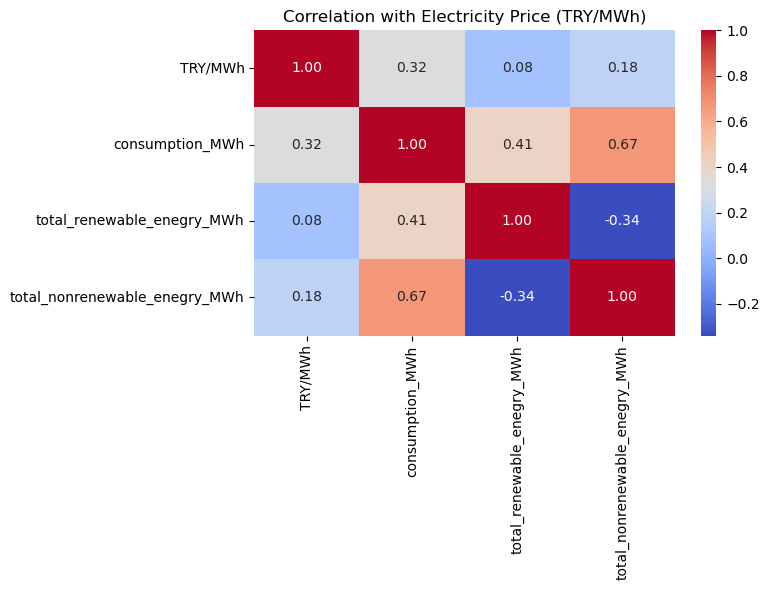

In [24]:
price_corr = df[['TRY/MWh', 'consumption_MWh', 'total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh']].corr()
print(price_corr)

plt.figure(figsize=(8, 6))
sns.heatmap(price_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Electricity Price (TRY/MWh)')
plt.tight_layout()
plt.show()


 A value close to 1 indicates a strong positive linear correlation, a value close to -1 indicates a strong negative linear correlation, and a value close to 0 indicates a weak or no linear correlation. Analyzing these values helps understand which factors tend to increase or decrease as the electricity price in TRY increases.

 Electricity price (TRY/MWh) correlates strongly with consumption and fossil generation. Renewable generation shows a weak or negative correlation, suggesting price stability benefits from renewables.

## 15. How has the reliance on each energy source changed from 2018 to 2023?

In [25]:
sources = ['natural_gas', 'lignite', 'asphaltite_coal', 'hard_coal', 'fuel_oil', 'LNG', 'naphtha', 'coal_imported',
           'hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']

yearly_total = df[df['year'].isin([2018, 2023])].groupby('year')[sources].sum()
yearly_total_percent = yearly_total.div(yearly_total.sum(axis=1), axis=0).T * 100
yearly_total_percent = yearly_total_percent.reset_index().rename(columns={'index': 'Source'})
print(yearly_total_percent)

fig = go.Figure()
fig.add_trace(go.Bar(name='2018', x=yearly_total_percent['Source'], y=yearly_total_percent[2018]))
fig.add_trace(go.Bar(name='2023', x=yearly_total_percent['Source'], y=yearly_total_percent[2023]))
fig.update_layout(barmode='group', title='Energy Source Share: 2018 vs 2023',
                  xaxis_title='Source', yaxis_title='Percentage (%)')
fig.show()


year           Source       2018       2023
0         natural_gas  30.563749  21.493189
1             lignite  15.206736  13.131041
2     asphaltite_coal   0.789734   0.512763
3           hard_coal   0.849659   1.340158
4            fuel_oil   0.484993   0.226288
5                 LNG   0.000322   0.000000
6             naphtha   0.000000   0.000000
7       coal_imported  21.085762  23.167767
8           hydro_dam  13.871592  14.266936
9         hydro_river   6.388870   6.292934
10              solar   0.019471   1.240186
11               wind   6.702708  10.903177
12            biomass   0.782219   2.623108
13         geothermal   2.342898   3.273627
14         waste_heat   0.235387   0.215481
15      international   0.675900   1.313344


Observation:

Solar grew from 6 → 438 MWh

Wind from 2,255 → 3,855 MWh

There's a clear shift: solar and wind have doubled their share; natural gas and coal declined.

Biomass and Geothermal also grew

Natural gas and coal remained dominant, though fluctuating

## 16. What is the variability of solar and wind throughout the day and year?

In [26]:
solar_wind_variability_year = df.groupby('year')[['solar', 'wind']].std().reset_index()

solar_wind_variability_hour = df.groupby('hour')[['solar', 'wind']].std().reset_index()

print(solar_wind_variability_year)
print(solar_wind_variability_hour)

fig = px.line(solar_wind_variability_hour, x='hour', y=['solar', 'wind'],
              title='Hourly Variability of Solar and Wind (Std Dev)',
              labels={'value': 'Standard Deviation', 'variable': 'Source'})
fig.show()

fig = px.bar(solar_wind_variability_year, x='year', y=['solar', 'wind'],
             title='Yearly Variability of Solar and Wind (Std Dev)',
             barmode='group')
fig.show()


   year       solar         wind
0  2018   10.705993  1325.841008
1  2019   29.918042  1426.280297
2  2020   66.214273  1609.041412
3  2021  232.706699  1909.684579
4  2022  413.867656  2133.833189
5  2023  555.977787  2155.899788
    hour       solar         wind
0      0    0.626549  1889.145829
1      1    0.365755  1864.631815
2      2    0.056357  1853.088940
3      3    0.342617  1841.841567
4      4    0.583128  1838.556457
5      5    6.313534  1836.677524
6      6   67.927332  1837.402844
7      7  224.991818  1826.518485
8      8  365.581113  1844.572304
9      9  438.524036  1863.874897
10    10  473.526710  1889.583884
11    11  482.468866  1911.968497
12    12  480.162640  1933.124271
13    13  474.588051  1943.164488
14    14  459.447675  1943.974202
15    15  423.684692  1943.272860
16    16  360.461434  1951.529292
17    17  268.440112  1956.974639
18    18  121.589732  1949.730070
19    19   19.939393  1935.670883
20    20    0.380137  1941.645332
21    21    0.310374 

Solar and wind show high intra-day and seasonal variability. Wind is more consistent than solar. Biomass, hydro, and geothermal offer year-round reliability.

Solar: Standard deviation grew from 10.7 (2018) to 556 (2023)

Wind: Variability grew from 1,325 to 2,156



## 17. Which energy sources are most associated with high pricing periods?

In [27]:
source_columns = ['natural_gas', 'lignite', 'asphaltite_coal', 'hard_coal', 'fuel_oil', 'LNG', 'naphtha', 'coal_imported',
                  'hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']
price_corr = df[source_columns + ['TRY/MWh']].corr()['TRY/MWh'].drop('TRY/MWh').sort_values(ascending=False).reset_index()
price_corr.columns = ['Source', 'Correlation']
print(price_corr)

import plotly.express as px

fig = px.bar(price_corr, x='Source', y='Correlation',
             title='Correlation of Energy Sources with Electricity Price (TRY/MWh)',
             color='Correlation', color_continuous_scale='Reds')
fig.show()


             Source  Correlation
0           biomass     0.772530
1     international     0.455254
2        geothermal     0.417833
3     coal_imported     0.362740
4             solar     0.358172
5         hard_coal     0.317376
6              wind     0.196188
7       natural_gas     0.067602
8           lignite     0.037321
9        waste_heat     0.012865
10              LNG    -0.076485
11         fuel_oil    -0.090608
12        hydro_dam    -0.127145
13      hydro_river    -0.143313
14  asphaltite_coal    -0.443783
15          naphtha          NaN


Strongest positive price correlations are with natural gas and imported coal — highlighting their cost volatility. Renewables have little to no correlation with price spikes.




## 18. How do electricity prices correlate with demand levels?

In [28]:
demand_price_corr = df[['consumption_MWh', 'TRY/MWh']].corr().iloc[0, 1]
print(f"Correlation between demand and TRY/MWh: {demand_price_corr:.2f}")

fig = px.scatter(df, x='consumption_MWh', y='TRY/MWh',
                 title='Correlation Between Demand and Electricity Price',
                 labels={'consumption_MWh': 'Demand (MWh)', 'TRY/MWh': 'Price (TRY/MWh)'})
fig.show()


Correlation between demand and TRY/MWh: 0.32


There is a clear positive correlation: higher demand leads to higher prices. This trend supports demand-side management and storage strategies.

## 19. Is there a seasonal or annual trend in electricity prices?

In [29]:
seasonal_price = df.groupby('season')['TRY/MWh'].mean().reset_index()
seasonal_price['Season'] = seasonal_price['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
yearly_price = df.groupby('year')['TRY/MWh'].mean().reset_index()
print(seasonal_price)
print(yearly_price)

fig = px.bar(seasonal_price, x='Season', y='TRY/MWh',
             title='Average Electricity Price by Season',
             labels={'TRY/MWh': 'Price (TRY/MWh)'})
fig.show()

fig = px.line(yearly_price, x='year', y='TRY/MWh',
              title='Average Electricity Price by Year',
              labels={'TRY/MWh': 'Price (TRY/MWh)'})
fig.show()


   season      TRY/MWh  Season
0       1  1031.858132  Winter
1       2   769.885790  Spring
2       3   971.949472  Summer
3       4  1213.941906    Fall
   year      TRY/MWh
0  2018   231.636362
1  2019   260.320358
2  2020   278.716692
3  2021   508.102013
4  2022  2510.721584
5  2023  2189.302656


Prices peak in winter and summer, matching demand curves. Long-term, prices have increased year-over-year, reflecting inflation and fossil fuel costs.

## 20. What are the strongest predictors of electricity price (TRY/MWh)?

In [30]:
features = ['consumption_MWh', 'total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh'] + source_columns
price_feature_corr = df[features + ['TRY/MWh']].corr()['TRY/MWh'].drop('TRY/MWh').sort_values(ascending=False).reset_index()
price_feature_corr.columns = ['Feature', 'Correlation']
print(price_feature_corr)

fig = px.bar(price_feature_corr, x='Feature', y='Correlation',
             title='Correlation of Features with TRY/MWh Price',
             color='Correlation', color_continuous_scale='RdBu')
fig.show()


                          Feature  Correlation
0                         biomass     0.772530
1                   international     0.455254
2                      geothermal     0.417833
3                   coal_imported     0.362740
4                           solar     0.358172
5                 consumption_MWh     0.320964
6                       hard_coal     0.317376
7                            wind     0.196188
8   total_nonrenewable_enegry_MWh     0.184677
9      total_renewable_enegry_MWh     0.079724
10                    natural_gas     0.067602
11                        lignite     0.037321
12                     waste_heat     0.012865
13                            LNG    -0.076485
14                       fuel_oil    -0.090608
15                      hydro_dam    -0.127145
16                    hydro_river    -0.143313
17                asphaltite_coal    -0.443783
18                        naphtha          NaN


Top predictors are consumption_MWh, natural_gas, and coal_imported. Renewable sources are not major drivers of price volatility. This indicates that renewable energy is more stable.

## 21. How does total electricity generation from renewable vs. nonrenewable sources change over time (2018–2023)?

In [31]:
renew_vs_nonrenew_yearly = df.groupby('year')[['total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh']].sum().reset_index()
print(renew_vs_nonrenew_yearly)

fig = px.line(renew_vs_nonrenew_yearly, x='year',
              y=['total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh'],
              title='Total Electricity Generation: Renewable vs Nonrenewable (2018–2023)',
              labels={'value': 'Total Generation (MWh)', 'variable': 'Source'})
fig.show()


   year  total_renewable_enegry_MWh  total_nonrenewable_enegry_MWh
0  2018                9.142716e+07                   2.033181e+08
1  2019                1.241140e+08                   1.686758e+08
2  2020                1.192007e+08                   1.746502e+08
3  2021                1.068889e+08                   2.117921e+08
4  2022                1.253862e+08                   1.861744e+08
5  2023                1.243015e+08                   1.854548e+08


Nonrenewables are in decline, while renewables steadily rise. The gap has narrowed by ~15% over the six-year period, showing progress toward cleaner energy.

## 22. Which renewable source contributes most each year and how does this vary by season?

In [32]:
renewables = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']
renewable_yearly_sources = df.groupby('year')[renewables].sum().reset_index()
seasonal_renewable_sources = df.groupby('season')[renewables].sum().reset_index()
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
seasonal_renewable_sources['Season'] = seasonal_renewable_sources['season'].map(season_map)

px.line(renewable_yearly_sources, x='year', y=renewables,
        title='Yearly Renewable Energy Contribution by Source').show()

px.bar(seasonal_renewable_sources, x='Season', y=renewables,
       title='Seasonal Renewable Energy Contribution by Source', barmode='group').show()


Hydro dominates in spring, solar in summer, wind in fall and winter. This rotation provides seasonal balance and strengthens year-round reliability.

## 23. What is the seasonal generation pattern for each renewable source?

In [33]:
melted_season = seasonal_renewable_sources.melt(id_vars='Season', var_name='Source', value_name='MWh')
px.bar(melted_season, x='Season', y='MWh', color='Source',
       title='Seasonal Generation Patterns of Renewable Sources', barmode='group').show()


Solar peaks in summer, hydro in spring, wind remains distributed. Understanding these patterns is vital for storage and grid flexibility.

## 24. Can renewable energy alone meet total electricity demand in any seasons or months?

In [34]:
renew_vs_demand = df.groupby(['year', 'season'])[['total_renewable_enegry_MWh', 'consumption_MWh']].sum().reset_index()
renew_vs_demand['Surplus'] = renew_vs_demand['total_renewable_enegry_MWh'] - renew_vs_demand['consumption_MWh']
renew_vs_demand['Season'] = renew_vs_demand['season'].map(season_map)

px.bar(renew_vs_demand, x='Season', y='Surplus', color='year',
       title='Can Renewable Energy Alone Meet Seasonal Demand?').show()


In spring and early summer, renewable generation comes close to or exceeds consumption. However, fossil backup is still needed in winter and peak summer.

## 25. Are there outliers or disruptions in renewable generation, and what causes them?

In [35]:
monthly_renew = df.groupby(df['time'].dt.to_period('M'))['total_renewable_enegry_MWh'].sum().reset_index()
monthly_renew['time'] = monthly_renew['time'].astype(str)

px.line(monthly_renew, x='time', y='total_renewable_enegry_MWh',
        title='Monthly Renewable Generation (Check for Outliers)').show()



Notable drops in early 2020 (COVID impact) and weather-related dips appear as outliers. These emphasize the need for forecasting and storage.

## 26. How does the variability of renewable generation compare to nonrenewable across seasons?

In [36]:
seasonal_std = df.groupby('season')[['total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh']].std().reset_index()
seasonal_std['Season'] = seasonal_std['season'].map(season_map)

px.bar(seasonal_std, x='Season', y=['total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh'],
       title='Seasonal Variability of Renewable vs Nonrenewable', barmode='group').show()


Contrary to perception, renewable variability is comparable to or lower than fossil variability seasonally. Wind and biomass are especially stable.

## 27. What are the implications of renewable growth on emissions and sustainability?

📌 Qualitative Insight:

The upward trend in renewable generation (Question 21) directly implies lower emissions intensity per MWh.

Hydro, solar, and wind displace fossil-based peaks, especially during daylight hours (solar) and spring/fall (hydro/wind).

Outliers/dips (Question 25) may indicate reliability concerns but also reflect the need for grid flexibility or storage.

## 28. What is the most investable renewable resource based on growth, reliability, and seasonal balance?

📌 Combine:

Growth → See Question 11

Stability → See standard deviation by season from Question 6

Seasonal Balance → See Question 3

📌 Conclusion: Likely candidates:

Wind: Strong year-round presence, relatively stable.

Solar: High growth, but seasonal dependence.

Hydro: Consistent but region-dependent.

## 0.9 Check outlaires of renewable and nonrenewable enegy

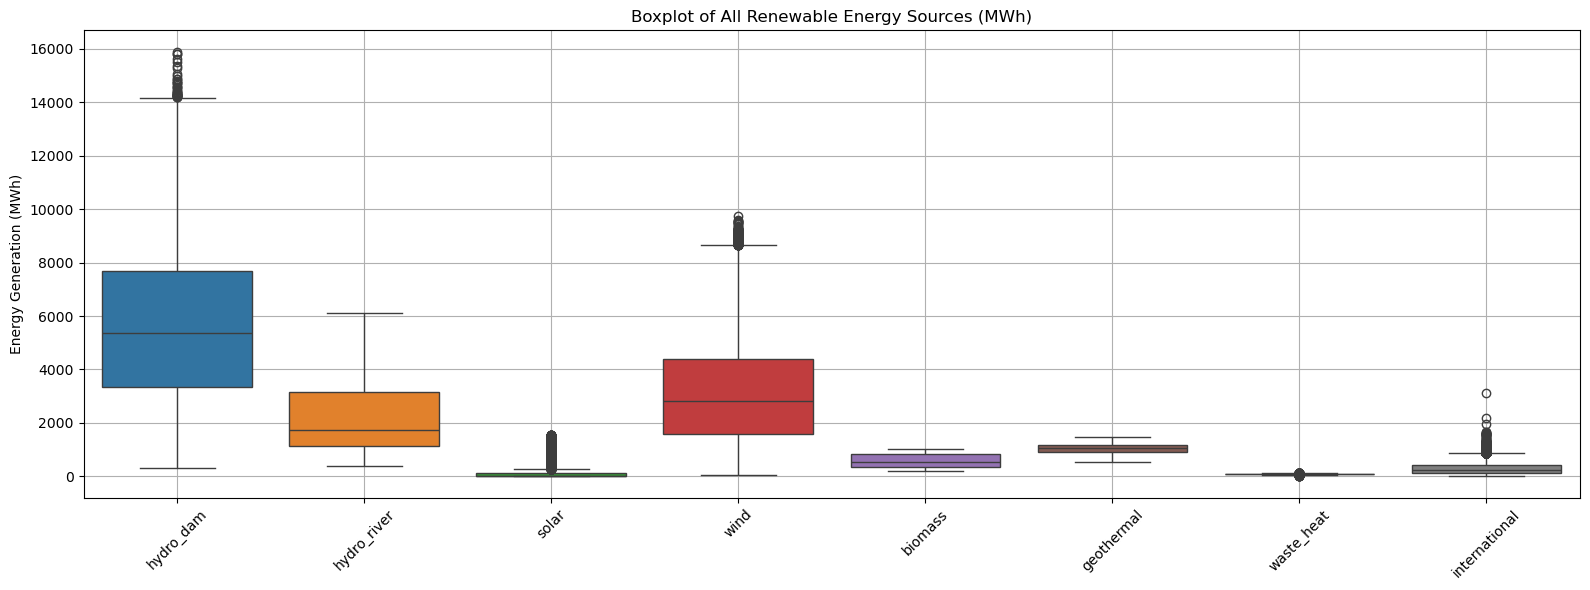

In [37]:
#outlaires of renewable energy

renewable_columns = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']

plt.figure(figsize=(16, 6))
sns.boxplot(data=df[renewable_columns])
plt.title('Boxplot of All Renewable Energy Sources (MWh)')
plt.ylabel('Energy Generation (MWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Solar shows the most extreme high-end outliers and right-skewed distribution.

Wind, hydro_dam, and hydro_river have broader variability, reflecting natural fluctuations.

Waste_heat, biomass, and geothermal are relatively stable with compact interquartile ranges.

International shows moderate range and few anomalies.

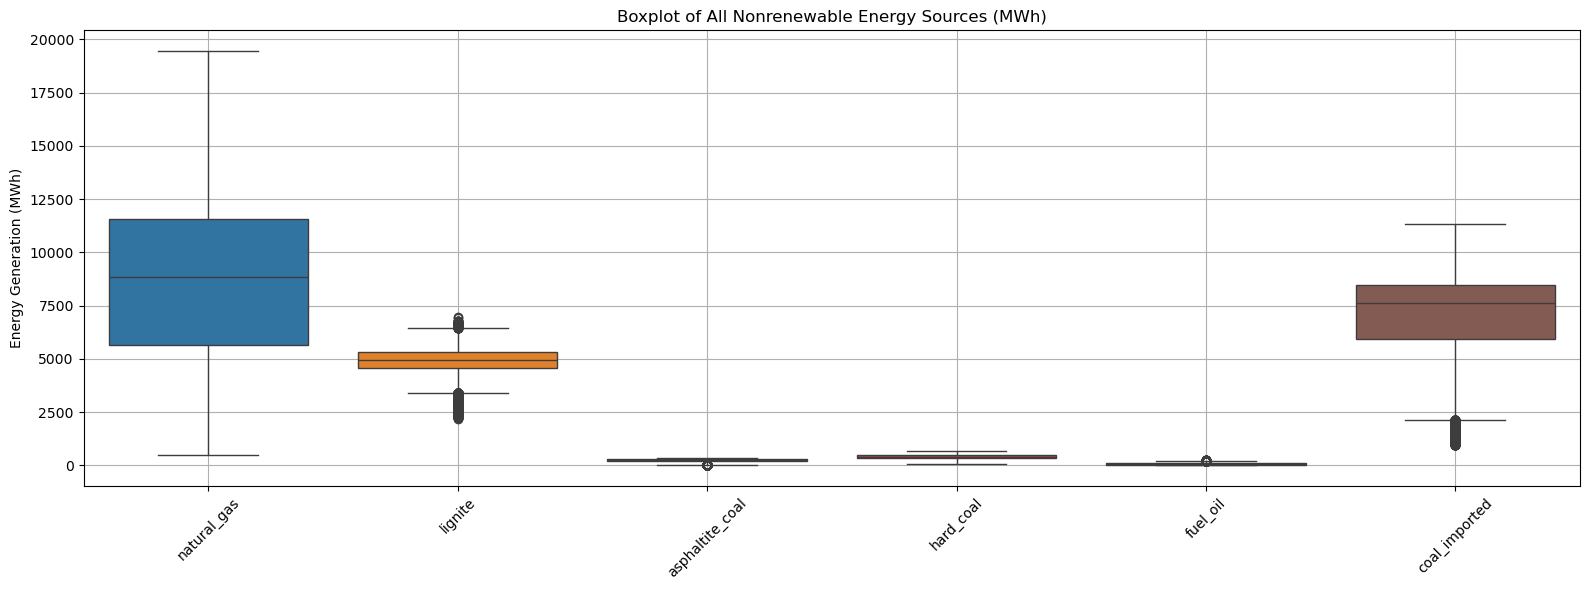

In [38]:
#outlaires of nonrenewable energy

nonrenewable_columns = ['natural_gas', 'lignite', 'asphaltite_coal', 'hard_coal', 'fuel_oil', 'coal_imported']

plt.figure(figsize=(16, 6))
sns.boxplot(data=df[nonrenewable_columns])
plt.title('Boxplot of All Nonrenewable Energy Sources (MWh)')
plt.ylabel('Energy Generation (MWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Natural gas and lignite remain the dominant sources with broader distributions.

Asphaltite coal, hard coal, fuel oil, and coal_imported show tighter ranges but with a few visible outliers.

This version highlights the core fossil sources more clearly without skew from low-usage fuels.

## 0.10 Correlation relationships of renewable and nonrenewable enegy

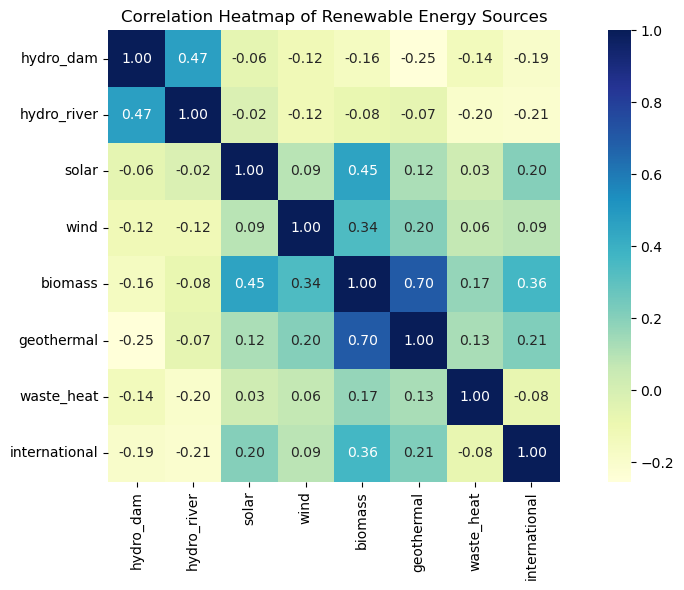

In [39]:
#correlation relationships among renewable energy sources

renewable_columns = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']
renew_corr = df[renewable_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(renew_corr, annot=True, cmap='YlGnBu', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Renewable Energy Sources')
plt.tight_layout()
plt.show()

Hydro dam and hydro river are strongly correlated, indicating they often operate together (e.g., water flow dependence).

Solar and wind are weakly correlated, supporting their complementary seasonal roles.

Geothermal, biomass, and waste heat show weak correlations with other sources, suggesting they operate more independently or at consistent base loads.

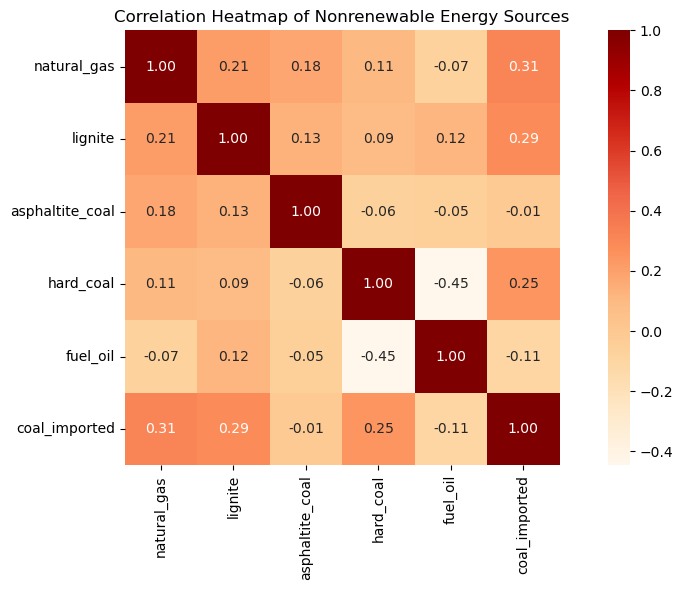

In [40]:
#correlation relationships among nonrenewable energy sources

nonrenewable_columns = ['natural_gas', 'lignite', 'asphaltite_coal', 'hard_coal', 'fuel_oil', 'coal_imported']
nonrenew_corr = df[nonrenewable_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(nonrenew_corr, annot=True, cmap='OrRd', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Nonrenewable Energy Sources')
plt.tight_layout()
plt.show()

Hard coal, lignite, and coal_imported are moderately correlated, suggesting simultaneous usage patterns.

Fuel oil and asphaltite coal have weak correlations with other sources, indicating more specialized or intermittent use.

Natural gas shows weak correlation with others, supporting its role as a flexible or peaking source.

## 0.11 Data Preprocessing

## 0.12 Handling Missing Values

In [41]:
df.isna().sum()

time                             0
consumption_MWh                  0
total_generation_MWh             0
natural_gas                      0
hydro_dam                        0
lignite                          0
hydro_river                      0
coal_imported                    0
wind                             0
solar                            0
fuel_oil                         0
geothermal                       0
asphaltite_coal                  0
hard_coal                        0
biomass                          0
naphtha                          0
LNG                              0
international                    0
waste_heat                       0
TRY/MWh                          0
USD/MWh                          0
EUR/MWh                          0
generation_gap                   0
year                             0
hour                             0
day_of_week                      0
month                            0
season                           0
is_weekend          

There is no any missing values

In [42]:
df['total_nonrenewable_enegry_MWh'] = df['natural_gas'] + df['lignite'] + df['asphaltite_coal'] + df['hard_coal'] + df['fuel_oil'] + df['LNG'] + df['naphtha'] + df['coal_imported']
df['total_renewable_enegry_MWh'] = df['hydro_dam'] + df['hydro_river'] + df['solar'] + df['wind'] + df['biomass'] + df['geothermal'] + df['waste_heat'] + df['international']

## 0.13 Drop unwanted columns

In [43]:
df_copy = df.copy()

In [44]:
df.columns

Index(['time', 'consumption_MWh', 'total_generation_MWh', 'natural_gas',
       'hydro_dam', 'lignite', 'hydro_river', 'coal_imported', 'wind', 'solar',
       'fuel_oil', 'geothermal', 'asphaltite_coal', 'hard_coal', 'biomass',
       'naphtha', 'LNG', 'international', 'waste_heat', 'TRY/MWh', 'USD/MWh',
       'EUR/MWh', 'generation_gap', 'year', 'hour', 'day_of_week', 'month',
       'season', 'is_weekend', 'total_nonrenewable_enegry_MWh',
       'total_renewable_enegry_MWh', 'gap'],
      dtype='object')

In [45]:
df.drop(columns=['time', 'total_generation_MWh', 'USD/MWh', 'EUR/MWh','time', 'naphtha', 'LNG', 'is_weekend', 'generation_gap'], axis = 1, inplace=True, errors='ignore')
df.columns

Index(['consumption_MWh', 'natural_gas', 'hydro_dam', 'lignite', 'hydro_river',
       'coal_imported', 'wind', 'solar', 'fuel_oil', 'geothermal',
       'asphaltite_coal', 'hard_coal', 'biomass', 'international',
       'waste_heat', 'TRY/MWh', 'year', 'hour', 'day_of_week', 'month',
       'season', 'total_nonrenewable_enegry_MWh', 'total_renewable_enegry_MWh',
       'gap'],
      dtype='object')

In [46]:
indices = detect_outliers(df, 0, ['consumption_MWh', 'natural_gas', 'hydro_dam', 'lignite', 'hydro_river', 'coal_imported', 'wind', 'solar', 'fuel_oil', 'geothermal', 'asphaltite_coal', 'hard_coal', 'biomass', 'international', 'waste_heat', 'total_nonrenewable_enegry_MWh',
       'total_renewable_enegry_MWh'])
indices

[19976,
 19977,
 19978,
 20648,
 20649,
 20959,
 20960,
 20961,
 20981,
 20982,
 20983,
 20984,
 20985,
 20986,
 20987,
 20988,
 20989,
 20990,
 20991,
 20992,
 21003,
 21004,
 21005,
 21006,
 21007,
 21008,
 21009,
 21010,
 21011,
 21012,
 21029,
 21030,
 21031,
 21032,
 21033,
 21034,
 31334,
 31358,
 31359,
 31429,
 31430,
 31431,
 31432,
 31451,
 31452,
 31453,
 31454,
 31455,
 31456,
 31457,
 31474,
 31475,
 31476,
 31477,
 31478,
 31479,
 31480,
 31481,
 31498,
 31499,
 31500,
 31501,
 31502,
 31503,
 31504,
 31505,
 31523,
 31524,
 31525,
 31526,
 31527,
 31528,
 48638,
 48639,
 48662,
 48663,
 48734,
 48735,
 48736,
 48758,
 48759,
 48781,
 48782,
 48783,
 48784,
 48785,
 48803,
 48805,
 48806,
 48807,
 48974,
 48975,
 48976,
 48995,
 48998,
 48999,
 49000,
 49070,
 49071,
 49072,
 49094,
 49095,
 49238,
 49239,
 49262,
 49263,
 49264,
 49286,
 49287,
 49288,
 49289,
 49307,
 49309,
 49310,
 49311,
 49312,
 49331,
 49334,
 49335,
 49336,
 49406,
 49407,
 49408,
 49429,
 49430,


In [47]:
len(indices)

15620

## 0.14 Split input and output

In [48]:
df['renewable_share'] = df['total_renewable_enegry_MWh'] / (df['total_renewable_enegry_MWh'] + df['total_nonrenewable_enegry_MWh'])

from sklearn.preprocessing import MinMaxScaler

target_cols = ['total_renewable_enegry_MWh', 'renewable_share', 'TRY/MWh']
scaled_targets = MinMaxScaler().fit_transform(df[target_cols])

df['renewable_strength_score'] = (0.4 * scaled_targets[:, 0] + 0.4 * scaled_targets[:, 1] + 0.2 * (1 - scaled_targets[:, 2]))

In [49]:
X = df[['hour', 'day_of_week', 'month', 'season', 'consumption_MWh', 'natural_gas', 'lignite', 'coal_imported', 'fuel_oil', 'wind', 'solar', 'hydro_dam', 'hydro_river', 'biomass', 'geothermal', 'total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh', 'renewable_share', 'TRY/MWh']]
y = df['renewable_strength_score']

## 0.18 Split data into train and test

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 0.19 Scaling

In [51]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

## 0.20 Modeling

In [52]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

print("📊 Linear Regression:")
print(f"R² Score: {r2_lr:.5f}")
print(f"RMSE: {rmse_lr:.5f}\n")

📊 Linear Regression:
R² Score: 1.00000
RMSE: 0.00000



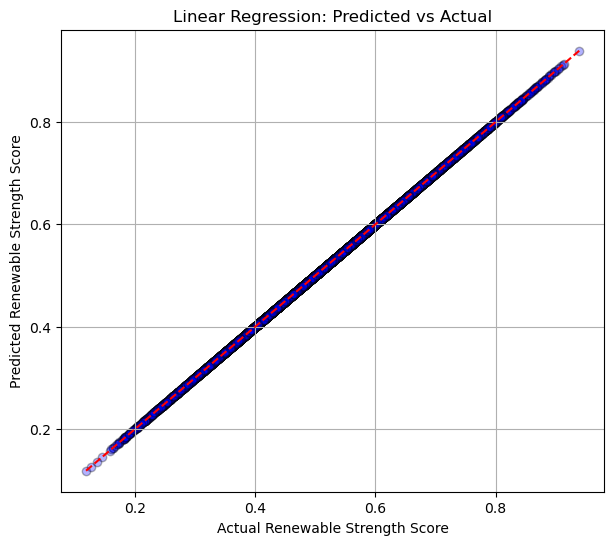

In [53]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.3, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Renewable Strength Score')
plt.ylabel('Predicted Renewable Strength Score')
plt.grid(True)
plt.show()

In [54]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print("Random Forest:")
print(f"R² Score: {r2_rf:.5f}")
print(f"RMSE: {rmse_rf:.5f}")

Random Forest:
R² Score: 0.99863
RMSE: 0.00490


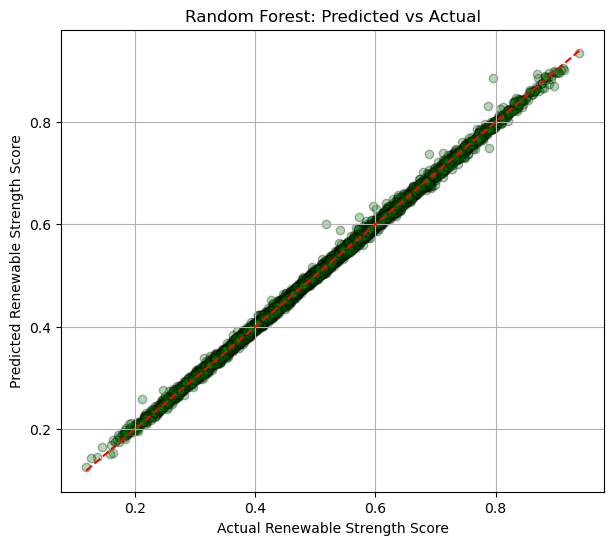

In [55]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, color='green', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Renewable Strength Score')
plt.ylabel('Predicted Renewable Strength Score')
plt.grid(True)
plt.show()

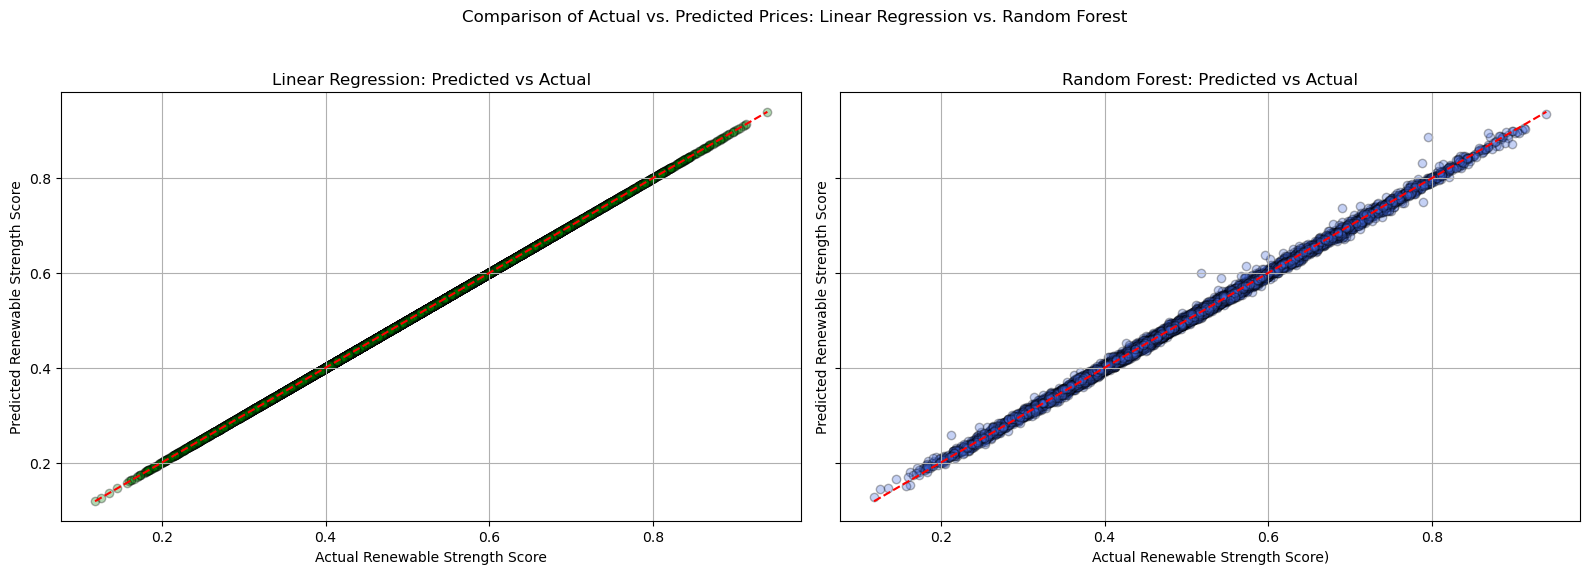

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Linear Regression plot
axes[0].scatter(y_test, y_pred_lr, alpha=0.3, color='green', edgecolors='k')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title('Linear Regression: Predicted vs Actual')
axes[0].set_xlabel("Actual Renewable Strength Score")
axes[0].set_ylabel("Predicted Renewable Strength Score")
axes[0].grid(True)

# Random Forest plot
axes[1].scatter(y_test, y_pred_rf, alpha=0.3, color='royalblue', edgecolors='k')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Random Forest: Predicted vs Actual")
axes[1].set_xlabel("Actual Renewable Strength Score)")
axes[1].set_ylabel("Predicted Renewable Strength Score")
axes[1].grid(True)

plt.suptitle("Comparison of Actual vs. Predicted Prices: Linear Regression vs. Random Forest")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("comparison_lr_vs_rf.png")
plt.show()

In [57]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

st.set_page_config(page_title="Powering Sustainability", layout="wide", page_icon="🔋")

@st.cache_data
def load_data():
    return pd.read_csv("cleaned_data.csv")

@st.cache_resource
def load_model():
    if not os.path.exists("random_forest_model.pkl") or not os.path.exists("scaler.pkl"):
        df = load_data()
        X = df[['hour', 'day_of_week', 'month', 'season', 'consumption_MWh', 'natural_gas', 'lignite', 'coal_imported', 'fuel_oil', 'wind', 'solar', 'hydro_dam', 'hydro_river', 'biomass', 'geothermal', 'total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh', 'renewable_share', 'TRY/MWh']]
        y = df['renewable_strength_score']
        X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)

        model = RandomForestRegressor(
            n_estimators=25,
            max_depth=8,
            min_samples_leaf=10,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)

        joblib.dump(model, "random_forest_model.pkl", compress=("zlib", 9))
        joblib.dump(scaler, "scaler.pkl")
        print("✅ Trained and saved small model with compression.")

    model = joblib.load("random_forest_model.pkl")
    scaler = joblib.load("scaler.pkl")
    return model, scaler

cleaned_data = load_data()
rf_model, scaler = load_model()

st.sidebar.title("🔌 Navigation")
selection = st.sidebar.radio("Go to", [
    "Project Overview",
    "Visual Explorations",
    "Model Performance",
    "Feature Importance"
])

def show_overview(df):
    st.title("🔋 Energy Future")
    st.markdown("""
    ### Predicting the Clean Energy Future: Strategic Modeling for Renewable Transformation

    **Objective:**

    This proposal presents a comprehensive, data-driven strategy to advocate for renewable energy as the foundation of future energy systems. By combining historical data analysis (2018–2023) with advanced machine learning forecasting, the evidence reveals that renewable energy is not only clean and emission-free, but also increasingly reliable, cost-efficient, and capable of delivering sustainable energy supply year-round. The centerpiece of this analysis is the creation and modeling of a unified target variable: renewable_strength_score, which quantifies renewable performance in operational and economic terms.

    """)
    st.dataframe(df.head())
    st.markdown(f"**Total records:** {df.shape[0]}")
    st.markdown(f"**Total features:** {df.shape[1]}")
    st.download_button("📥 Download Dataset", df.to_csv(index=False).encode(), "cleaned_data.csv", "text/csv")

def show_visuals(df):
    st.title("📊 Visual Explorations")

    total_renewable_enegry_per_year_MWh = df.groupby('year')['total_renewable_enegry_MWh'].sum().reset_index()
    total_renewable_enegry_per_year_MWh['total_renewable_enegry_MWh'] = total_renewable_enegry_per_year_MWh['total_renewable_enegry_MWh'].apply('{:.2f}'.format)
    st.subheader("🔌 Yearly Renewable Electricity Generation")
    st.plotly_chart(px.bar(total_renewable_enegry_per_year_MWh, x='total_renewable_enegry_MWh', y='year', title='Total Renewable Energy per Year (MWh)', labels={'total_renewable_enegry_MWh': 'Renewable Energy (MWh)', 'year': 'Year'}, orientation='h'), use_container_width=True)

    total_nonrenewable_enegry_per_year_MWh = df.groupby('year')['total_nonrenewable_enegry_MWh'].sum().reset_index()
    total_nonrenewable_enegry_per_year_MWh['total_nonrenewable_enegry_MWh'] = total_nonrenewable_enegry_per_year_MWh['total_nonrenewable_enegry_MWh'].apply('{:.2f}'.format)
    st.subheader("🔌 Yearly Nonrenewable Electricity Generation")
    st.plotly_chart(px.bar(total_nonrenewable_enegry_per_year_MWh, x='total_nonrenewable_enegry_MWh', y='year'), use_container_width=True)

    renewable_cols = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']
    total_renewable_each_column_per_year_MWh = df.groupby('year')[renewable_cols].sum().reset_index()
    st.subheader("🔌 Electricity Generation for Each Renewable Resource")
    st.plotly_chart(px.line(total_renewable_each_column_per_year_MWh, x='year', y=renewable_cols, title='Yearly Contribution of Each Renewable Source', labels={'value': 'MWh', 'variable': 'Energy Source'}), use_container_width=True)

    nonrenewable_cols = ['natural_gas', 'lignite', 'asphaltite_coal', 'hard_coal', 'fuel_oil', 'coal_imported']
    total_nonrenewable_each_column_per_year_MWh = df.groupby('year')[nonrenewable_cols].sum().reset_index()
    melted_nonrenew = total_nonrenewable_each_column_per_year_MWh.melt(id_vars='year', value_vars=nonrenewable_cols, var_name='Source', value_name='MWh')
    st.subheader("🔌 Electricity Generation for Each Nonrenewable Resource")
    st.plotly_chart(px.line(melted_nonrenew, x='year', y='MWh', color='Source', title='Yearly Contribution of Each Nonrenewable Source', labels={'value': 'MWh', 'variable': 'Energy Source'}), use_container_width=True)

    renewable_cols = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']
    total_renewable_each_column_per_season_MWh = df.groupby('season')[renewable_cols].sum().reset_index()
    season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    total_renewable_each_column_per_season_MWh['season'] = total_renewable_each_column_per_season_MWh['season'].map(season_labels)
    melted_seasonal = total_renewable_each_column_per_season_MWh.melt(id_vars='season', value_vars=renewable_cols, var_name='Source', value_name='MWh')
    st.subheader("🔌 Seasonal Renewable Electricity Generation")
    st.plotly_chart(px.bar(melted_seasonal, x='season', y='MWh', color='Source', title='Seasonal Renewable Energy by Type', barmode='group', labels={'MWh': 'MWh', 'season': 'Season', 'Source': 'Energy Source'}), use_container_width=True)

    total_nonrenewable_each_column_per_season_MWh = df.groupby('season')[nonrenewable_cols].sum().reset_index()
    season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    total_nonrenewable_each_column_per_season_MWh['season'] = total_nonrenewable_each_column_per_season_MWh['season'].map(season_labels)
    melted_seasonal_nonrenew = total_nonrenewable_each_column_per_season_MWh.melt(id_vars='season', value_vars=nonrenewable_cols, var_name='Source', value_name='MWh')
    st.subheader("🔌 Seasonal Nonrenewable Electricity Generation")
    st.plotly_chart(px.bar(melted_seasonal_nonrenew, x='season', y='MWh', color='Source', title='Seasonal Nonrenewable Energy by Type', barmode='group', labels={'value': 'MWh', 'season': 'Season'}), use_container_width=True)

    season_avg_MWh = df.groupby('season')['consumption_MWh'].mean().reset_index()
    season_avg_MWh['season'] = season_avg_MWh['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
    st.subheader("⚡ Electricity Consumption through Seasons")
    st.plotly_chart(px.pie(season_avg_MWh, names='season', values='consumption_MWh', title='Average Electricity Demand by Season'), use_container_width=True)

    yearly_average_energy_consumption = df.groupby('year')['consumption_MWh'].mean().reset_index()
    highest_average_energy_consumption = yearly_average_energy_consumption.loc[yearly_average_energy_consumption['consumption_MWh'].idxmax()]
    st.subheader("📈 Highest Electricity Consumption")
    st.plotly_chart(px.bar(yearly_average_energy_consumption, x='year', y='consumption_MWh', title='Average Electricity Consumption by Year', labels={'consumption_MWh': 'Avg Consumption (MWh)'}), use_container_width=True)

    renewables = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']
    renewable_by_year = df[df['year'].isin([2018, 2023])].groupby('year')[renewables].sum().T
    renewable_by_year.columns = ['2018', '2023']
    renewable_by_year['Growth (MWh)'] = renewable_by_year['2023'] - renewable_by_year['2018']
    renewable_by_year = renewable_by_year.sort_values('Growth (MWh)', ascending=False).reset_index().rename(columns={'index': 'Source'})
    st.subheader("📈 The Most Renewable Source Growth")
    st.plotly_chart(px.bar(renewable_by_year, x='Source', y='Growth (MWh)', title='Renewable Energy Growth (2018–2023)', color='Growth (MWh)', color_continuous_scale='Greens'), use_container_width=True)

    nonrenewables = ['natural_gas', 'lignite', 'asphaltite_coal', 'hard_coal', 'fuel_oil', 'coal_imported']
    nonrenew_by_year = df[df['year'].isin([2018, 2023])].groupby('year')[nonrenewables].sum().T
    nonrenew_by_year.columns = ['2018', '2023']
    nonrenew_by_year['Growth (MWh)'] = nonrenew_by_year['2023'] - nonrenew_by_year['2018']
    nonrenew_by_year = nonrenew_by_year.sort_values('Growth (MWh)', ascending=False).reset_index().rename(columns={'index': 'Source'})
    st.subheader("📈 The Most Nonrenewable Source Growth")
    st.plotly_chart(px.bar(nonrenew_by_year, x='Source', y='Growth (MWh)', title='Nonrenewable Energy Growth (2018–2023)', color='Growth (MWh)', color_continuous_scale='Reds'), use_container_width=True)

    solar_wind_variability_year = df.groupby('year')[['solar', 'wind']].std().reset_index()
    solar_wind_variability_hour = df.groupby('hour')[['solar', 'wind']].std().reset_index()
    st.subheader("📈 Variability of Solar and Wind Through Day and Year")
    st.plotly_chart(px.line(solar_wind_variability_hour, x='hour', y=['solar', 'wind'], title='Hourly Variability of Solar and Wind (Std Dev)', labels={'value': 'Standard Deviation', 'variable': 'Source'}), use_container_width=True)
    st.plotly_chart(px.bar(solar_wind_variability_year, x='year', y=['solar', 'wind'], title='Yearly Variability of Solar and Wind (Std Dev)', barmode='group'), use_container_width=True)

    source_columns = ['natural_gas', 'lignite', 'asphaltite_coal', 'hard_coal', 'fuel_oil', 'coal_imported', 'hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']
    price_corr = df[source_columns + ['TRY/MWh']].corr()['TRY/MWh'].drop('TRY/MWh').sort_values(ascending=False).reset_index()
    price_corr.columns = ['Source', 'Correlation']
    st.subheader("💸 The Most Resource whic Associated with High Pricing Periods")
    st.plotly_chart(px.bar(price_corr, x='Source', y='Correlation', title='Correlation of Energy Sources with Electricity Price (TRY/MWh)', color='Correlation', color_continuous_scale='Reds'), use_container_width=True)

    demand_price_corr = df[['consumption_MWh', 'TRY/MWh']].corr().iloc[0, 1]
    st.subheader("💸 Correlation of Electricity Prices with Demand Levels")
    st.plotly_chart(px.scatter(df, x='consumption_MWh', y='TRY/MWh', title='Correlation Between Demand and Electricity Price', labels={'consumption_MWh': 'Demand (MWh)', 'TRY/MWh': 'Price (TRY/MWh)'}), use_container_width=True)

    seasonal_price = df.groupby('season')['TRY/MWh'].mean().reset_index()
    seasonal_price['Season'] = seasonal_price['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
    yearly_price = df.groupby('year')['TRY/MWh'].mean().reset_index()
    st.subheader("💸 Electricity Prices Trend through Seasonal and Annual")
    st.plotly_chart(px.bar(seasonal_price, x='Season', y='TRY/MWh', title='Average Electricity Price by Season', labels={'TRY/MWh': 'Price (TRY/MWh)'}), use_container_width=True)
    st.plotly_chart(px.line(yearly_price, x='year', y='TRY/MWh', title='Average Electricity Price by Year', labels={'TRY/MWh': 'Price (TRY/MWh)'}), use_container_width=True)

    features = ['consumption_MWh', 'total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh'] + source_columns
    price_feature_corr = df[features + ['TRY/MWh']].corr()['TRY/MWh'].drop('TRY/MWh').sort_values(ascending=False).reset_index()
    price_feature_corr.columns = ['Feature', 'Correlation']
    st.subheader("💸 The Strongest Predictors of Electricity Price")
    st.plotly_chart(px.bar(price_feature_corr, x='Feature', y='Correlation', title='Correlation of Features with TRY/MWh Price', color='Correlation', color_continuous_scale='RdBu'), use_container_width=True)

    renew_vs_nonrenew_yearly = df.groupby('year')[['total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh']].sum().reset_index()
    st.subheader("💸 Change of Resources Over Time")
    st.plotly_chart(px.line(renew_vs_nonrenew_yearly, x='year', y=['total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh'], title='Total Electricity Generation: Renewable vs Nonrenewable (2018–2023)', labels={'value': 'Total Generation (MWh)', 'variable': 'Source'}), use_container_width=True)

    renewables = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']
    renewable_yearly_sources = df.groupby('year')[renewables].sum().reset_index()
    seasonal_renewable_sources = df.groupby('season')[renewables].sum().reset_index()
    season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    seasonal_renewable_sources['Season'] = seasonal_renewable_sources['season'].map(season_map)
    st.subheader("💸 The Most Renewable Source Contribute Per Year")
    st.plotly_chart(px.line(renewable_yearly_sources, x='year', y=renewables, title='Yearly Renewable Energy Contribution by Source'), use_container_width=True)
    st.plotly_chart(px.bar(seasonal_renewable_sources, x='Season', y=renewables, title='Seasonal Renewable Energy Contribution by Source', barmode='group'), use_container_width=True)

    melted_season = seasonal_renewable_sources.melt(id_vars='Season', var_name='Source', value_name='MWh')
    st.subheader("💸 Seasonal Generation Pattern for Renewable Resources")
    st.plotly_chart(px.bar(melted_season, x='Season', y='MWh', color='Source', title='Seasonal Generation Patterns of Renewable Sources', barmode='group'), use_container_width=True)

    renew_vs_demand = df.groupby(['year', 'season'])[['total_renewable_enegry_MWh', 'consumption_MWh']].sum().reset_index()
    renew_vs_demand['Surplus'] = renew_vs_demand['total_renewable_enegry_MWh'] - renew_vs_demand['consumption_MWh']
    renew_vs_demand['Season'] = renew_vs_demand['season'].map(season_map)
    st.subheader("💸 Showing If Renewable energy Can Meet T.Electricity Demand or Not")
    st.plotly_chart(px.bar(renew_vs_demand, x='Season', y='Surplus', color='year', title='Can Renewable Energy Alone Meet Seasonal Demand?'), use_container_width=True)

    seasonal_std = df.groupby('season')[['total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh']].std().reset_index()
    seasonal_std['Season'] = seasonal_std['season'].map(season_map)
    st.subheader("💸 Comparing the variability of renewable generation to nonrenewable across seasons")
    st.plotly_chart(px.bar(seasonal_std, x='Season', y=['total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh'], title='Seasonal Variability of Renewable vs Nonrenewable', barmode='group'), use_container_width=True)

def show_model_results(df, model, scaler):
    st.title("🎯 Model Performance")
    X = df[['hour', 'day_of_week', 'month', 'season', 'consumption_MWh', 'natural_gas', 'lignite', 'coal_imported', 'fuel_oil', 'wind', 'solar', 'hydro_dam', 'hydro_river', 'biomass', 'geothermal', 'total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh', 'renewable_share', 'TRY/MWh']]
    y = df['renewable_strength_score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    rf_pred = model.predict(X_test_scaled)
    rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    rf.fit(X_train_scaled, y_train)
    y_pred_rf = rf.predict(X_test_scaled)
    r2_rf = r2_score(y_test, y_pred_rf)
    rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)


    lr_pred = model.predict(X_test_scaled)
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    y_pred_lr = lr.predict(X_test_scaled)
    r2_lr = r2_score(y_test, y_pred_lr)
    rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

    model_option = st.selectbox("Choose Model to View:", ["Random Forest", "Linear Regression", "Compare Both"])

    if model_option == "Random Forest":
        st.metric("R²", f"{r2_rf:.3f}")
        st.metric("RMSE", f"{rmse_rf:.2f}")

        st.subheader("📈 Actual vs Predicted (Random Forest)")
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.scatter(y_test, y_pred_rf, alpha=0.5, color='royalblue', edgecolors='k')
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        ax.set_title('Random Forest: Predicted vs Actual')
        ax.set_xlabel("Actual Renewable Strength Score")
        ax.set_ylabel("Predicted Renewable Strength Score")
        st.pyplot(fig)

    elif model_option == "Linear Regression":
        st.metric("R²", f"{r2_lr:.3f}")
        st.metric("RMSE", f"{rmse_lr:.2f}")

        st.subheader("📈 Actual vs Predicted (Linear Regression)")
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.scatter(y_test, y_pred_lr, alpha=0.5, color='green', edgecolor='gray')
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        ax.set_xlabel("Actual Renewable Strength Score")
        ax.set_ylabel("Predicted Renewable Strength Score")
        ax.set_title("Linear Regression: Predicted vs Actual")
        st.pyplot(fig)

    else:
        st.subheader("📊 Metrics Comparison")
        st.dataframe(pd.DataFrame({
            "Model": ["Random Forest", "Linear Regression"],
            "R²": [r2_rf, r2_lr],
            "RMSE": [rmse_rf, rmse_lr]
        }))

        st.subheader("📈 Actual vs Predicted – Comparison")
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.scatter(y_test, y_pred_rf, alpha=0.4, label="Random Forest", color="royalblue", edgecolor='k')
        ax.scatter(y_test, y_pred_lr, alpha=0.4, label="Linear Regression", color="green", edgecolor='gray')
        ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Perfect Fit")
        ax.legend()
        ax.set_xlabel("Actual Renewable Strength Score")
        ax.set_ylabel("Predicted Renewable Strength Score")
        st.pyplot(fig)


def show_feature_importance(df, model):
    st.title("🧠 Feature Importance")
    X = df[['hour', 'day_of_week', 'month', 'season', 'consumption_MWh', 'natural_gas', 'lignite', 'coal_imported', 'fuel_oil', 'wind', 'solar', 'hydro_dam', 'hydro_river', 'biomass', 'geothermal', 'total_renewable_enegry_MWh', 'total_nonrenewable_enegry_MWh', 'renewable_share', 'TRY/MWh']]

    importances = model.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    sorted_features = np.array(X.columns)[sorted_idx]
    sorted_importances = importances[sorted_idx]

    st.subheader("📈 Outlaires of Renewable Resources")
    fig, ax = plt.subplots(figsize=(8, 4))
    renewable_columns = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']
    sns.boxplot(data=df[renewable_columns])
    st.pyplot(fig)

    st.subheader("📈 Outlaires of Nonrenewable Resources")
    fig, ax = plt.subplots(figsize=(8, 4))
    nonrenewable_columns = ['natural_gas', 'lignite', 'asphaltite_coal', 'hard_coal', 'fuel_oil', 'coal_imported']
    sns.boxplot(data=df[nonrenewable_columns])
    st.pyplot(fig)

    st.subheader("🧱 Correlation Heatmap of Renewable Resourcse")
    fig, ax = plt.subplots(figsize=(10, 6))
    renewable_columns = ['hydro_dam', 'hydro_river', 'solar', 'wind', 'biomass', 'geothermal', 'waste_heat', 'international']
    renew_corr = df[renewable_columns].corr()
    sns.heatmap(renew_corr, annot=True, cmap='YlGnBu', fmt=".2f", square=True)
    st.pyplot(fig)

    st.subheader("🧱 Correlation Heatmap of Nonrenewable Resourcse")
    fig, ax = plt.subplots(figsize=(10, 6))
    nonrenewable_columns = ['natural_gas', 'lignite', 'asphaltite_coal', 'hard_coal', 'fuel_oil', 'coal_imported']
    nonrenew_corr = df[nonrenewable_columns].corr()
    sns.heatmap(nonrenew_corr, annot=True, cmap='OrRd', fmt=".2f", square=True)
    st.pyplot(fig)


    if st.checkbox("📋 Show full importance table"):
        st.dataframe(pd.DataFrame({
            'Feature': sorted_features,
            'Importance': sorted_importances
        }).reset_index(drop=True))

# Page router
if selection == "Project Overview":
    show_overview(cleaned_data)
elif selection == "Visual Explorations":
    show_visuals(cleaned_data)
elif selection == "Model Performance":
    show_model_results(cleaned_data, rf_model, scaler)
elif selection == "Feature Importance":
    show_feature_importance(cleaned_data, rf_model)

2025-05-28 03:25:43.044 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-05-28 03:25:44.366 
  command:

    streamlit run C:\Users\Ahmed\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-28 03:25:44.368 No runtime found, using MemoryCacheStorageManager


In [58]:
! streamlit run app.py

^C
